In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP SMART\Desktop\data.csv")
data.head()

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area
0,1,0,1,66278,3989,1,Con,Shenavan
1,2,0,0,64701,7076,1,Alphonso,Shubenka
2,3,1,1,28045,5659,1,Bordy,Chowṉêy
3,4,0,0,21690,6314,0,Margot,Pakxong
4,5,0,0,67479,9894,0,Denice,Ardazubre


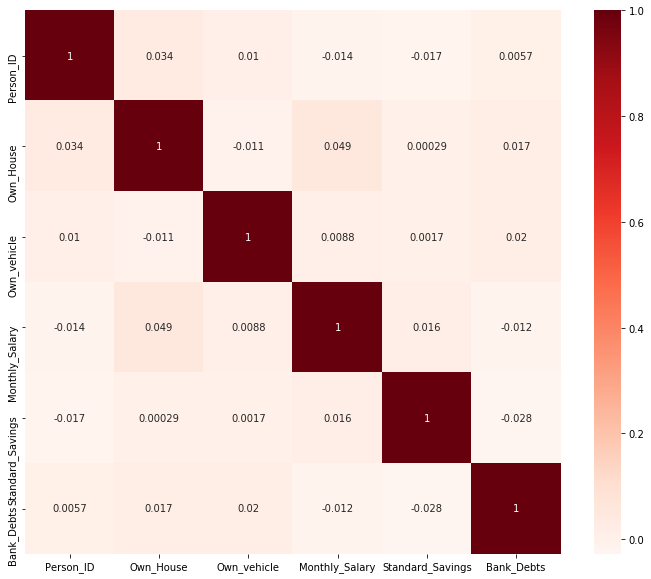

In [3]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
data.isnull().sum()

Person_ID           0
Own_House           0
Own_vehicle         0
Monthly_Salary      0
Standard_Savings    0
Bank_Debts          0
Name                0
Area                0
dtype: int64

In [5]:
data.Area.value_counts()

Urrao              4
Gonghe             4
Aygek              4
Songhae            4
Oslo               4
Baryshevo          4
Al Bāriqīyah       4
Frederiksberg      4
Xinji              4
San Vicente        4
Motala             4
Tharyarwady        4
Shenavan           4
Sydney             4
San Antonio        4
Longquan           4
Dasheng            4
Kungälv            2
Bahía Honda        2
Liufu              2
Ḩawallī            2
Nuquí              2
Aguas Verdes       2
Santa Tecla        2
Świeradów-Zdrój    2
Longshe            2
San Juan           2
Ash Shuqayrah      2
Gandusari          2
Hengfan            2
                  ..
Strohonivka        2
Minnedosa          2
Roa                2
Xinhe              2
Lluka e Eperme     2
Milano             2
Trang              2
Norrköping         2
Jetak              2
Sibubuhan          2
Los Frentones      2
Granada            2
Gaohu              2
New York City      2
Danilov            2
Mamponteng         2
Yangce       

In [6]:
len(data.Area.value_counts())

983

In [7]:
data1=data.drop(['Name','Person_ID','Area','Own_House','Own_vehicle','Bank_Debts',],axis=1)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Monthly_Salary      2000 non-null int64
Standard_Savings    2000 non-null int64
dtypes: int64(2)
memory usage: 31.3 KB


In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,verbose=2)
kmeans.fit(data1)

Initialization complete
Iteration 0, inertia 122842986182.0
Iteration 1, inertia 85018527952.56793
Iteration 2, inertia 80137960116.83878
Iteration 3, inertia 79391679335.86192
Iteration 4, inertia 79163992849.62224
Iteration 5, inertia 79096825624.0919
Converged at iteration 5: center shift 10491.576858641858 within tolerance 26287.47747352232.
Initialization complete
Iteration 0, inertia 89762068496.0
Iteration 1, inertia 80908738484.81407
Iteration 2, inertia 79359537953.65622
Iteration 3, inertia 79145158334.1822
Iteration 4, inertia 79094063300.45589
Converged at iteration 4: center shift 23507.028274810873 within tolerance 26287.47747352232.
Initialization complete
Iteration 0, inertia 118386123299.0
Iteration 1, inertia 98335691014.82811
Iteration 2, inertia 92861207208.08667
Iteration 3, inertia 88520443940.916
Iteration 4, inertia 85381064298.7275
Iteration 5, inertia 83557614659.39554
Iteration 6, inertia 82311118663.23169
Iteration 7, inertia 81496824684.71169
Iteration 8, i

KMeans(n_clusters=4, verbose=2)

In [10]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,30471.121272,5377.751491
1,70301.124752,5436.532673
2,50535.498986,5560.640974
3,89564.082164,5538.262525


In [11]:
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 3])

In [12]:
len(list(kmeans.labels_))

2000

In [13]:
df_data=pd.concat([data.Person_ID,pd.Series(kmeans.labels_)],axis=1)
df_data

,Person_ID,0
0,1,1
1,2,1
2,3,0
3,4,0
4,5,1
5,6,1
6,7,3
7,8,3
8,9,3
9,10,2


In [14]:
df_data.rename(columns={0:'Groups'},inplace = True)
df_data

,Person_ID,Groups
0,1,1
1,2,1
2,3,0
3,4,0
4,5,1
5,6,1
6,7,3
7,8,3
8,9,3
9,10,2


In [15]:
df_data.shape

(2000, 2)

In [16]:
kmeans.fit(data1).score(data1)

Initialization complete
Iteration 0, inertia 91102586937.0
Iteration 1, inertia 80574982153.25966
Iteration 2, inertia 79842385311.4708
Iteration 3, inertia 79543952470.17093
Iteration 4, inertia 79443511730.01811
Iteration 5, inertia 79386488847.69427
Iteration 6, inertia 79316691989.85526
Iteration 7, inertia 79280789475.50856
Converged at iteration 7: center shift 16319.087355210597 within tolerance 26287.47747352232.
Initialization complete
Iteration 0, inertia 132168974748.0
Iteration 1, inertia 95289019084.77722
Iteration 2, inertia 90955197286.81409
Iteration 3, inertia 87117366886.48813
Iteration 4, inertia 84504062749.7912
Iteration 5, inertia 83146540055.19595
Iteration 6, inertia 81954416558.36516
Iteration 7, inertia 81323097547.35988
Iteration 8, inertia 80962316360.4975
Iteration 9, inertia 80637461275.54987
Iteration 10, inertia 80207660586.61163
Iteration 11, inertia 79800277167.58228
Iteration 12, inertia 79548155037.77295
Iteration 13, inertia 79443511730.01811
Iterat

-79137542827.208

In [17]:
aa = list()
for i in range(1,8):
    kmean_auto = KMeans(n_clusters=i)
    kmean_auto.fit(data1)
    scr = kmean_auto.fit(data1).score(data1)
    scr1 = scr*(-1)
    aa.append(scr1)

print (aa)

[1051499098940.8948, 272367447792.94397, 130610585484.6197, 79137542827.208, 57005956197.05021, 43563593732.895836, 34935505017.188095]


In [18]:
plt.figure(figsize=(8,8))
aa=np.absolute(aa)
abc=[1,2,3,4,5,6,7]
plt.plot(abc,aa,marker='*',color='r')
plt.xlabel('number pf cluster')
plt.ylabel('Ssd')
plt.title('Elbow plot on SNS Data')
plt.grid(linestyle='--')

In [19]:
df_data.to_csv(r"D:\New Folder.csv",index=False)